<a href="https://colab.research.google.com/github/Mamadou2025/Rickart-Semiring-Analyser-Gcd_Max/blob/main/Max_Rickart_Semiring_Analyzer_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from itertools import product

def is_endomorphism(f, M):
    """Check if f preserves the max operation"""
    for x, y in product(M, repeat=2):
        if f[max(x, y)] != max(f[x], f[y]):
            return False
    return True

def is_idempotent(f, M):
    """Check if f ∘ f = f"""
    for x in M:
        if f[f[x]] != f[x]:
            return False
    return True

def generate_endomorphisms(n):
    """Generate all endomorphisms of M = {0,...,n} with f(0) = 0"""
    M = list(range(n + 1))
    S = []
    for f_tuple in product(M, repeat=len(M)):
        f = {i: f_tuple[i] for i in M}
        if is_endomorphism(f, M) and f[0] == 0:
            S.append(f)
    return M, S

def right_annihilator(f, S, M):
    """Compute r_S(f) = {g ∈ S | f∘g = 0}"""
    r = []
    zero = {x: 0 for x in M}
    for g in S:
        fog = {x: f[g[x]] for x in M}
        if fog == zero:
            r.append(g)
    return r

def image_set(f, S, M):
    """Compute Im_S(f) = {f∘g | g ∈ S}"""
    images = set()
    for g in S:
        fog = tuple(f[g[x]] for x in M)
        images.add(fog)
    return images

def f_compose_S(f, S, M):
    """Compute fS = {f∘g | g ∈ S}"""
    fS = set()
    for g in S:
        fog = tuple(f[g[x]] for x in M)
        fS.add(fog)
    return fS

def find_generator(f, S, M):
    """Find minimal generator for Im_S(f) according to new rules"""
    # Case 1: f is idempotent - f is its own generator
    if is_idempotent(f, M):
        return f

    # Case 2: f is not idempotent - find an idempotent f_j with f_iS = f_jS
    current_fS = f_compose_S(f, S, M)

    for f_j in S:
        if is_idempotent(f_j, M):
            f_jS = f_compose_S(f_j, S, M)
            if f_jS == current_fS:
                return f_j

    # If no idempotent found (theoretically impossible case), return f
    return f

def is_i_rickart(S, M):
    """Check if S is i-Rickart"""
    for f in S:
        if is_idempotent(f, M):
            f_composed = {tuple(f[g[x]] for x in M) for g in S}
            if f_composed == {tuple(f[x] for x in M)}:
                return True
    return False

def subtractive_closure(S, M):
    """Compute subtractive closure Im_S(f) for all f ∈ S"""
    closure = set()
    for f in S:
        im = image_set(f, S, M)
        closure.update(im)
    return {tuple(f[x] for x in M) for f in S} == closure

def is_w_rickart(S, M):
    """Check if S is w-Rickart"""
    if not is_i_rickart(S, M):
        return False
    return subtractive_closure(S, M)

def generate_latex_table(M, S):
    # Assign identifiers to functions
    func_tuples = [tuple(f[i] for i in M) for f in S]
    sorted_funcs = sorted(func_tuples)
    func_ids = {t: f"f_{i}" for i, t in enumerate(sorted_funcs)}

    # Prepare table data
    table_data = []
    for i, f_tuple in enumerate(sorted_funcs):
        f = {x: f_tuple[x] for x in M}
        f_id = func_ids[f_tuple]

        # Compute properties
        r_s = right_annihilator(f, S, M)
        f_s = f_compose_S(f, S, M)
        im_s = image_set(f, S, M)
        generator = find_generator(f, S, M)

        # Format for LaTeX
        r_s_str = "\\{ " + ", ".join(func_ids[tuple(g[x] for x in M)] for g in r_s) + " \\}"
        f_s_str = "\\{ " + ", ".join(func_ids[t] for t in f_s) + " \\}"
        im_s_str = "\\{ " + ", ".join(func_ids[t] for t in im_s) + " \\}"
        gen_str = f"<{func_ids[tuple(generator[x] for x in M)]}>"

        table_data.append((f_id, f_tuple, r_s_str, f_s_str, im_s_str, gen_str))

    # Generate LaTeX table
    latex_table = r"""\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\( f_i \) & \( r_{S}(f_i) \) & \( f_i S \) & \( \text{Im}_{S}(f_i) \) & \( \text{ generator } \)\\
\hline
"""

    for f_id, f_tuple, r_s, f_s, im_s, gen in table_data:
        latex_table += f"\( {f_id}= {f_tuple} \) & \( {r_s} \) & \( {f_s} \) & \( {im_s} \) & \( {gen} \) \\\\ \n"

    latex_table += r"""\hline
\end{tabular}
\caption{Table of the endomorphisms \( f_i \), their sets \( r_{S}(f_i) \), \( \text{Im}_{S}(f_i) \) and \( f_i S \).}
\end{table}"""

    return latex_table

def test_rickart_properties(n):
    M, S = generate_endomorphisms(n)
    print(f"Analysis for M = {list(M)} (n={n}):")
    print(f"Number of endomorphisms: {len(S)}")

    # Generate table
    latex_table = generate_latex_table(M, S)
    print(latex_table)

    # Test Rickart properties
    i_rickart = is_i_rickart(S, M)
    w_rickart = is_w_rickart(S, M) if i_rickart else False

    print("\nConclusion:")
    if i_rickart:
        print("S is i-Rickart.")
        if w_rickart:
            print("S is w-Rickart.")
        else:
            print("S is not w-Rickart.")
    else:
        print("S is not i-Rickart.")

# Example usage
n = 2  # You can change this value
test_rickart_properties(n)

Analysis for M = [0, 1, 2] (n=2):
Number of endomorphisms: 6
\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\( f_i \) & \( r_{S}(f_i) \) & \( f_i S \) & \( \text{Im}_{S}(f_i) \) & \( \text{ generator } \)\\ 
\hline
\( f_0= (0, 0, 0) \) & \( \{ f_0, f_1, f_2, f_3, f_4, f_5 \} \) & \( \{ f_0 \} \) & \( \{ f_0 \} \) & \( <f_0> \) \\ 
\( f_1= (0, 0, 1) \) & \( \{ f_0, f_1, f_3 \} \) & \( \{ f_0, f_1, f_3 \} \) & \( \{ f_0, f_1, f_3 \} \) & \( <f_3> \) \\ 
\( f_2= (0, 0, 2) \) & \( \{ f_0, f_1, f_3 \} \) & \( \{ f_0, f_5, f_2 \} \) & \( \{ f_0, f_5, f_2 \} \) & \( <f_2> \) \\ 
\( f_3= (0, 1, 1) \) & \( \{ f_0 \} \) & \( \{ f_0, f_1, f_3 \} \) & \( \{ f_0, f_1, f_3 \} \) & \( <f_3> \) \\ 
\( f_4= (0, 1, 2) \) & \( \{ f_0 \} \) & \( \{ f_0, f_2, f_4, f_5, f_1, f_3 \} \) & \( \{ f_0, f_2, f_4, f_5, f_1, f_3 \} \) & \( <f_4> \) \\ 
\( f_5= (0, 2, 2) \) & \( \{ f_0 \} \) & \( \{ f_0, f_5, f_2 \} \) & \( \{ f_0, f_5, f_2 \} \) & \( <f_5> \) \\ 
\hline
\end{tabular}
\caption{Table

**Usage**
Modify the n parameter in test_rickart_properties(n) to analyze different endomorphism sets.

Example execution:

python
n = 2  # Change this value for different sizes
test_rickart_properties(n)
Output
A LaTeX-formatted table summarizing the functional mappings and key properties.

Final conclusion determining whether the set satisfies i-Rickart and w-Rickart properties.

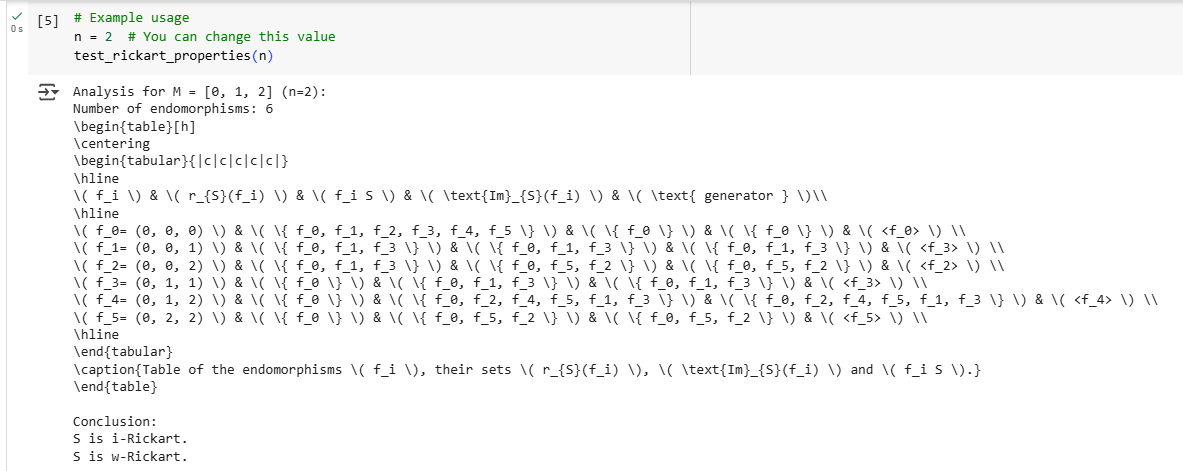

**Endomorphism and Rickart Property Analysis**

This Python script explores endomorphisms within the set {0, ..., n} and evaluates algebraic properties such as idempotency, right annihilation, and Rickart properties. It uses itertools.product to systematically generate all possible endomorphisms and performs structural analysis.


Endomorphism Validation: Checks if a given function preserves the max operation.

Idempotency Check: Ensures f ∘ f = f.

Generation of Endomorphisms: Produces all valid functions for M = {0, ..., n} satisfying f(0) = 0.

Structural Computations:

Right annihilator set

Image set computation

Function composition analysis

Minimal generator detection

Rickart Property Verification:

i-Rickart set validation

w-Rickart verification through subtractive closure
